In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
############################################
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
########################
from sklearn.feature_selection import SelectKBest, chi2,f_regression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
class Load_Data():
    def data(self):
        self.path=input('Pleas Enter Your Path Of Data : ')
        while(True):
            ext=self.path.split('.')
            try:
                if ext[1]=='csv':
                    return pd.read_csv(self.path)
                elif ext[1]=='xlsx':
                    return pd.read_excel(self.path)
                elif ext[1]=='tsv':
                    return pd.read_csv(self.path, sep='\t')
                break
            except Exception as e:
                print(f"An error occurred: {e}")
                self.path=input('Pleas Enter Your Path Of Data : ')

In [3]:
class EDA:
#Histogram For Numerical Feature
  def numerical_visualization_hist(self,data):
    col=data.select_dtypes(include='number').columns
    plt.figure(figsize=(20, int(10 *np.ceil(len(col)/2))))
    for i, col_name in enumerate(col):
        plt.subplot(int(np.ceil(len(col)/2)),2,i+1)
        data[col_name].plot(kind='hist',color='red')
        plt.title(f"histogram for {col_name}",fontsize=20)
        plt.ylabel('Count',fontsize=15)
        plt.xlabel('Value',fontsize=15)
        plt.grid(True)
        plt.xticks(rotation=15)
#BoxPlot For Numerical Feature 
  def numerical_visualization_box(self,data):
    col=data.select_dtypes(include='number').columns
    plt.figure(figsize=(20, int(10 *np.ceil(len(col)/2))))
    for i, col_name in enumerate(col):
        plt.subplot(int(np.ceil(len(col)/2)),2,i+1)
        sns.boxplot(data[col_name],color='y')
        plt.title(f"BoxPlot for {col_name}",fontsize=20)
        plt.ylabel('Count',fontsize=15)
        plt.xlabel('Value',fontsize=15)
        plt.grid(True)
        plt.xticks(rotation=15)
#Violin For Numerical Feature
  def numerical_visualization_violin(self,data):
    col=data.select_dtypes(include='number').columns
    plt.figure(figsize=(20, int(10 *np.ceil(len(col)/2))))
    for i, col_name in enumerate(col):
        plt.subplot(int(np.ceil(len(col)/2)),2,i+1)
        sns.violinplot(data[col_name],color='y')
        plt.title(f"ViolinPlot for {col_name}",fontsize=20)
        plt.ylabel('Count',fontsize=15)
        plt.xlabel('Value',fontsize=15)
        plt.grid(True)
        plt.xticks(rotation=15)
#BarPlot For Categorical Feature
  def categorical_visualization_bar(self,data):
    col=data.select_dtypes(include='object').columns
    plt.figure(figsize=(20, int(10 *np.ceil(len(col)/2))))
    for i, col_name in enumerate(col):
        plt.subplot(int(np.ceil(len(col)/2)),2,i+1)
        if len(data[col_name].value_counts())>15:
            data[col_name].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',color=['r','b','y'])
            plt.title(f"BarPlot For top 20 values {col_name} to max 20",fontsize=20)
        else:
            data[col_name].value_counts().plot(kind='bar',color=['r','b','y'])
            plt.title(f"BarPlot for {col_name}",fontsize=20)             
        plt.ylabel('Count',fontsize=15)
        plt.xlabel('Value',fontsize=15)
        plt.grid(True)
        plt.xticks(rotation=15)
#PiePlot For Categorical Feature
  def categorical_visualization_pie(self,data):
    col=data.select_dtypes(include='object').columns
    plt.figure(figsize=(20, int(10 *np.ceil(len(col)/2))))
    for i, col_name in enumerate(col):
        plt.subplot(int(np.ceil(len(col)/2)),2,i+1)
        if len(data[col_name].value_counts())>15:
            plt.pie(data[col_name].value_counts().sort_values(ascending=False).head(20),labels=list(data[col_name].value_counts().sort_values(ascending=False).head(20).index),autopct ='%1.2f%%')
            plt.title(f"PiePlot for top 20 values {col_name} to max 20",fontsize=20)
        else:
            plt.pie(data[col_name].value_counts(),labels=list(data[col_name].value_counts().index),autopct ='%1.2f%%')
            plt.title(f"BarPlot for {col_name}",fontsize=20)             
        plt.xticks(rotation=30)  
#HeatMap For Numerical Feature
  def heatmap_for_numerical(self,data):
    da=data[data.select_dtypes(include='number').columns]
    plt.figure(figsize=(20,10))
    sns.heatmap(da.corr(),annot=True,cbar=False,cmap='RdBu')
    return da.corr()

In [4]:
class Classification:
    #Label
    def Label(self,target):
        lab = LabelEncoder()
        for i in target:
            self.data[i] = lab.fit_transform(self.data[i])
    #Split
    def split(self,test_size):
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.data.drop(self.target,axis=1),self.data[self.target],test_size=test_size,shuffle=True,random_state=44)
        return self.X_test
    #Handel Missing
    def missing(self):
        col=self.data[self.data.isna()].columns
        for c in col:
            if self.data[c].dtype == 'object' or self.data[c].dtype == 'bool':
                mode_value = self.data[c].mode()[0]
                self.data[c].fillna(mode_value, inplace=True)
            elif self.data[c].dtype == 'int64' or self.data[c].dtype == 'float64':
                mean_value = self.data[c].mean()
                self.data[c].fillna(mean_value, inplace=True)
    #Normalize
    def min_max(self):
        key=self.data.drop(self.target, axis=1).keys()
        scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
        scaled_features = scaler.fit_transform(self.data.drop(self.target, axis=1))
        self.data=pd.concat([pd.DataFrame(scaled_features,columns=key),self.data[self.target]],axis=1)
    #Handel Imbalanced
    def smote_f(self):
        sm=SMOTE()
        x,y=sm.fit_resample(self.data.drop(self.target,axis=1),self.data[self.target])
        self.data=pd.concat([x,y],axis=1)
    #Select Feature
    def feature_select(self, k=30):
        X_new = SelectKBest(f_regression, k=k).fit_transform(self.data.drop(self.target, axis=1), self.data[self.target])
        X_new_df = pd.DataFrame(X_new)
        self.data = pd.concat([X_new_df, self.data[self.target]], axis=1)
    #Outliers Handel
    def Outliers(self):
        col=self.data.select_dtypes(include='number').columns
        for i in col:
            q75,q25 = np.percentile(self.data[i],[75,25])
            intr_qr = q75-q25
            max = q75+(1.5*intr_qr)
            min = q25-(1.5*intr_qr)
            self.data[i][self.data[i]>max]=max
            self.data[i][self.data[i]<min]=min
    def Polynomial(self,degree=3):
        X = PolynomialFeatures(degree=degree).fit_transform(self.data.drop(self.target,axis=1),self.data[self.target])
        self.data=pd.concat([pd.DataFrame(X),self.data[self.target]],axis=1)
    #Setup
    def setup(self, data, target,fold=10,Normlize=False,fix_imbalance=False,test_size=.2,feature_selection=False,k=30,outliers_handel=False,poly_feature=False,degree=3,dummies=False,reg=False):
        #data
        self.fold=fold
        self.data = data.copy()
        self.target=target
        #handel missing
        missing_value=self.data.isna().sum().sum()
        self.missing()
        #outliers
        out=None
        if outliers_handel:
            self.Outliers()
            out=True
        #Type Classification
        if reg:
            typ=['Regression']
        else:
            typ = ['Binary' if len(pd.unique(data[target]) == 2) else 'MultiClassification']
        #Handel Object Columns
        dum='LabelEncoder'
        if dummies:
            dum_=pd.get_dummies(self.data.drop(self.target,axis=1))
            self.data=pd.concat([dum_,self.data[self.target]],axis=1)
            dum='get_dummies'
        self.Label(self.data.select_dtypes(include='object').columns)
        if reg:
            mapping='Numerical'
        else:
            before = pd.unique(data[target])
            after = pd.unique(self.data[target])
            mapping = {i: x for i, x in zip(before, after)}
        #Balanced
        smote=None
        if reg:
            pass
        elif fix_imbalance:
            smote='SMOTE'
            self.smote_f()
        #####feature
        feature=None
        if feature_selection:
            self.feature_select(k)
            feature='SelectKBest'
        ####Polynomial
        poly=None
        if poly_feature:
            self.Polynomial(degree)
            poly=True
        #norm
        norm=None
        if Normlize:
            norm='MinMaxScaler'
            self.min_max()
        #Split
        self.split(test_size)
        dict_ = [
            ('Target', target),
            ('Target type', typ[0]),
            ('Target mapping', mapping),
            ('Original data shape', data.shape),
            ('Transformed data shape', self.data.shape),
            ('Transformed train set shape',(self.X_train.shape[0],self.X_train.shape[1]+1)),
            ('Transformed test set shape',(self.X_test.shape[0],self.X_test.shape[1]+1)),
            ('Numeric features',len(data.drop(target,axis=1).select_dtypes(include='number').columns)),
            ('Categorical features',len(data.drop(target,axis=1).select_dtypes(include='object').columns)),
            ('Missing Value',missing_value>0),
            ('Preprocess', True),
            ('Imputation type', 'simple'),
            ('Numeric imputation', 'mean'),
            ('Categorical imputation', 'mode'),
            ('Encoder',dum),
            ('Fold Generator','KFold'),
            ('Fold Number',fold),
            ('Normalize',norm),
            ('SMOTE',smote),
            ('Feature Selection',feature),
            ('Outliers Handel',out),
            ('Polynomial',poly)
        ]
        return pd.DataFrame(dict_, columns=['Description', 'Value'])
    #Compare
    def compare_models(self,cross_validation=True):
        random = RandomForestClassifier()
        knn=KNeighborsClassifier()
        decision=DecisionTreeClassifier()
        logistic=LogisticRegression()
        gradient=GradientBoostingClassifier()
        mult=MultinomialNB()
        svc=SVC()
        sgd=SGDClassifier()
        xgb=XGBClassifier() 
        ad=AdaBoostClassifier()
        acc=[]
        auc_value=[]
        recall=[]
        pre=[]
        f1=[]
        if cross_validation:
            kf = KFold(n_splits=self.fold, random_state=44, shuffle=True)
            for i in tqdm(['random','knn','decision','logistic','gradient','mult','svc','sgd','xgb','ad']):
                acc_,auc_,re,pr,f=[],[],[],[],[]
                for train_index, test_index in kf.split(self.data):
                    X_train, X_test = self.data.drop(self.target, axis=1).iloc[train_index], self.data.drop(self.target, axis=1).iloc[test_index]
                    y_train, y_test = self.data[self.target].iloc[train_index], self.data[self.target].iloc[test_index]
                    eval(i).fit(X_train,y_train)
                    y_pred=eval(i).predict(X_test)
                    acc_.append(accuracy_score(y_test,y_pred))
                    fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
                    auc_.append(auc(fprValue2, tprValue2))
                    re.append(recall_score(y_test,y_pred))
                    pr.append(precision_score(y_test,y_pred))
                    f.append(f1_score(y_test,y_pred))
                acc.append(np.mean(acc_))
                auc_value.append(np.mean(auc_))
                recall.append(np.mean(re))
                pre.append(np.mean(pr))
                f1.append(np.mean(f))     
        else:
            for i in tqdm(['random','knn','decision','logistic','gradient','mult','svc','sgd','xgb','ad']):
                eval(i).fit(self.X_train,self.y_train)
                y_test,y_pred=self.y_test,eval(i).predict(self.X_test)
                acc.append(accuracy_score(y_test,y_pred))
                fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
                auc_value.append(auc(fprValue2, tprValue2))
                recall.append(recall_score(y_test,y_pred))
                pre.append(precision_score(y_test,y_pred))
                f1.append(f1_score(y_test,y_pred))
        model=['RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier',
            'LogisticRegression','GradientBoostingClassifier','MultinomialNB',
            'SVC','SGDClassifier','XGBClassifier','AdaBoostClassifier']
        df=pd.DataFrame(index=['random','knn','decision','logistic','gradient','mult','svc','sgd','xgb','ad'])
        df['Models']=model
        df['Accuracy'],df['AUC'],df['Recall'],df['Precision'],df['F1']=acc,auc_value,recall,pre,f1
        df=df.sort_values(by=['F1','Accuracy'],ascending=False)
        self.best = eval(df.iloc[0].name)
        return df
    #best Model
    def automl(self):
        return self.best
    #Create Model
    def create_model(self,model_abbreviation):
        evp=['random','knn','decision','logistic','gradient','mult','svc','sgd','xgb','ad']
        name=['RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier',
                        'LogisticRegression','GradientBoostingClassifier','MultinomialNB',
                        'SVC','SGDClassifier','XGBClassifier','AdaBoostClassifier']
        if model_abbreviation in evp:
            ind=evp.index(model_abbreviation)
            self.model=eval(name[ind])()
        else:
            self.model=model_abbreviation
    def evaluate_model(self,cross_validation=True):
        dict_ = {'Accuracy': [], 'AUC': [], 'Recall': [], 'Precision': [], 'F1': []}
        if cross_validation:
            kf = KFold(n_splits=self.fold, random_state=44, shuffle=True)
            for train_index, test_index in tqdm(kf.split(self.data)):
                X_train, X_test = self.data.drop(self.target, axis=1).iloc[train_index], self.data.drop(self.target, axis=1).iloc[test_index]
                y_train, y_test = self.data[self.target].iloc[train_index], self.data[self.target].iloc[test_index]
                self.model.fit(X_train,y_train)
                y_pred=self.model.predict(X_test)
                dict_['Accuracy'].append(accuracy_score(y_test,y_pred))
                fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
                dict_['AUC'].append(auc(fprValue2, tprValue2))
                dict_['Recall'].append(recall_score(y_test,y_pred))
                dict_['Precision'].append(precision_score(y_test,y_pred))
                dict_['F1'].append(f1_score(y_test,y_pred))
        else:
            self.model.fit(self.X_train,self.y_train)
            y_test,y_pred=self.y_test,self.model.predict(self.X_test)
            dict_['Accuracy'].append(accuracy_score(y_test,y_pred))
            fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
            dict_['AUC'].append(auc(fprValue2, tprValue2))
            dict_['Recall'].append(recall_score(y_test,y_pred))
            dict_['Precision'].append(precision_score(y_test,y_pred))
            dict_['F1'].append(f1_score(y_test,y_pred))
        df = pd.DataFrame(dict_)
        df.loc['Mean'] = df.mean()
        df.loc['Std'] = df.std()
        return df
    def Confusion(self):
        y_pred=self.model.predict(self.X_test)
        CM = confusion_matrix(self.y_test, y_pred)
        sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
        plt.show()
    def classification(self):
        y_pred=self.model.predict(self.X_test)
        return classification_report(self.y_test,y_pred)
    def roc_curve(self):
        plt.figure(figsize=(8, 6))
        y_pred = self.model.predict(self.X_test)
        fpr, tpr, _ = roc_curve(self.y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2,label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        plt.show()

In [5]:
class Regression(Classification):
    def setup(self,data, target,fold=10,Normlize=False,fix_imbalance=False,test_size=.2,feature_selection=False,k=30,outliers_handel=False,poly_feature=False,degree=3,dummies=False,reg=False):
        return super().setup(data=data,target=target,fold=fold,Normlize=Normlize,fix_imbalance=fix_imbalance,test_size=test_size,feature_selection=feature_selection,k=k,outliers_handel=outliers_handel,poly_feature=poly_feature,degree=degree,dummies=dummies,reg=True)
    #Compare
    def compare_models(self,cross_validation=True):
        linear=LinearRegression()
        sgd=SGDRegressor()
        rid=Ridge()
        lasso=Lasso()
        random=RandomForestRegressor()
        gradient=GradientBoostingRegressor()
        svr=SVR()
        decision=DecisionTreeRegressor()
        knn=KNeighborsRegressor()
        xgb=XGBRegressor()
        acc=[]
        mae=[]
        mse=[]
        med=[]
        if cross_validation:
            kf = KFold(n_splits=self.fold, random_state=44, shuffle=True)
            for i in tqdm(['linear','sgd','rid','lasso','random','gradient','svr','decision','knn','xgb']):
                acc_=[]
                ma=[]
                ms=[]
                me=[]
                for train_index, test_index in kf.split(self.data):
                    X_train, X_test = self.data.drop(self.target, axis=1).iloc[train_index], self.data.drop(self.target, axis=1).iloc[test_index]
                    y_train, y_test = self.data[self.target].iloc[train_index], self.data[self.target].iloc[test_index]
                    eval(i).fit(X_train,y_train)
                    y_pred=eval(i).predict(X_test)
                    acc_.append(r2_score(y_test,y_pred))
                    ma.append(mean_absolute_error(y_test,y_pred))
                    ms.append(mean_squared_error(y_test,y_pred))
                    me.append(median_absolute_error(y_test,y_pred))
                acc.append(np.mean(acc_))
                mae.append(np.mean(ma))
                mse.append(np.mean(ms))
                med.append(np.mean(me))
        else:
            for i in tqdm(['linear','sgd','rid','lasso','random','gradient','svr','decision','knn','xgb']):
                eval(i).fit(self.X_train,self.y_train)
                y_pred=eval(i).predict(self.X_test)
                acc.append(r2_score(self.y_test,y_pred))
                mae.append(mean_absolute_error(self.y_test,y_pred))
                mse.append(mean_squared_error(self.y_test,y_pred))
                med.append(median_absolute_error(self.y_test,y_pred))
        model=['LinearRegression','SGDRegressor','Ridge','Lasso','RandomForestRegressor',
               'GradientBoostingRegressor','SVR','DecisionTreeRegressor','KNeighborsRegressor'
              ,'XGBRegressor']
        df=pd.DataFrame(index=['linear','sgd','rid','lasso','random','gradient','svr','decision','knn','xgb'])
        df['Models']=model
        df['R2'],df['MAE'],df['MSE'],df['MED']=acc,mae,mse,med
        df=df.sort_values(by=['MAE','R2'])
        self.best = eval(df.iloc[0].name)
        return df
    def create_model(self,model_abbreviation):
        evp=['linear','sgd','rid','lasso','random','gradient','svr','decision','knn','xgb']
        name=['LinearRegression','SGDRegressor','Ridge','Lasso','RandomForestRegressor',
               'GradientBoostingRegressor','SVR','DecisionTreeRegressor','KNeighborsRegressor'
              ,'XGBRegressor']
        if model_abbreviation in evp:
            ind=evp.index(model_abbreviation)
            self.model=eval(name[ind])()
        else:
            self.model=model_abbreviation
    def evaluate_model(self,cross_validation=True):
        dict_ = {'R2': [], 'MAE': [], 'MSE': [], 'MED': []}
        if cross_validation:
            kf = KFold(n_splits=self.fold, random_state=44, shuffle=True)
            for train_index, test_index in tqdm(kf.split(self.data)):
                    X_train, X_test = self.data.drop(self.target, axis=1).iloc[train_index], self.data.drop(self.target, axis=1).iloc[test_index]
                    y_train, y_test = self.data[self.target].iloc[train_index], self.data[self.target].iloc[test_index]
                    self.model.fit(X_train,y_train)
                    y_pred=self.model.predict(X_test)
                    dict_['R2'].append(r2_score(y_test,y_pred))
                    dict_['MAE'].append(mean_absolute_error(y_test,y_pred))
                    dict_['MSE'].append(mean_squared_error(y_test,y_pred))
                    dict_['MED'].append(median_absolute_error(y_test,y_pred))
        else:
            self.model.fit(self.X_train,self.y_train)
            y_pred=self.model.predict(self.X_test)
            dict_['R2'].append(r2_score(self.y_test,y_pred))
            dict_['MAE'].append(mean_absolute_error(self.y_test,y_pred))
            dict_['MSE'].append(mean_squared_error(self.y_test,y_pred))
            dict_['MED'].append(median_absolute_error(self.y_test,y_pred))
        df = pd.DataFrame(dict_)
        df.loc['Mean'] = df.mean()
        df.loc['Std'] = df.std()
        return df
    def Check(self):
        y_pred=self.model.predict(self.X_test)
        print('R2 Score is :',r2_score(self.y_test,y_pred))
        MAEValue = mean_absolute_error(self.y_test, y_pred) 
        print('Mean Absolute Error Value is : ', MAEValue)
        MSEValue = mean_squared_error(self.y_test, y_pred) 
        print('Mean Squared Error Value is : ', MSEValue)
        MdSEValue = median_absolute_error(self.y_test, y_pred)
        print('Median Absolute Error Value is : ', MdSEValue )

In [6]:
load=Load_Data()
data=load.data()
data.head()

Pleas Enter Your Path Of Data : WA_Fn-UseC_-HR-Employee-Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
eda=EDA()

In [8]:
#eda.categorical_visualization_bar(data)

In [9]:
#eda.categorical_visualization_pie(data)

In [10]:
clas=Classification()

In [11]:
clas.setup(data,target='Attrition',fold=10,Normlize=True,fix_imbalance=True,outliers_handel=True)

,Description,Value
0,Target,Attrition
1,Target type,Binary
2,Target mapping,"{'Yes': 1, 'No': 0}"
3,Original data shape,"(1470, 35)"
4,Transformed data shape,"(2466, 35)"
5,Transformed train set shape,"(1972, 35)"
6,Transformed test set shape,"(494, 35)"
7,Numeric features,26
8,Categorical features,8
9,Missing Value,False


In [12]:
clas.X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1024,0.690476,1.0,0.183966,0.5,0.035714,0.75,0.6,0.0,0.697629,0.000000,...,0.333333,0.0,0.8,0.912281,0.375000,1.000000,1.000000,1.000000,0.666667,0.413793
1977,0.452381,1.0,0.762348,0.5,0.928571,0.00,0.4,0.0,0.175133,0.000000,...,0.333333,0.0,0.0,0.582726,0.375000,0.666667,0.000000,0.000000,0.000000,0.000000
2110,0.214286,0.5,0.001432,0.5,0.785714,0.25,0.2,0.0,0.014030,0.666667,...,0.333333,0.0,0.0,0.208310,0.865789,0.666667,0.166667,0.136479,0.000000,0.204718
641,0.333333,0.5,0.198282,1.0,0.142857,0.25,0.2,0.0,0.429608,0.333333,...,1.000000,0.0,0.4,0.350877,0.625000,0.666667,0.555556,0.551724,0.666667,0.206897
2036,0.547619,0.5,0.916249,0.5,0.214286,0.50,0.2,0.0,0.593130,0.000000,...,0.000000,0.0,0.0,0.260833,0.375000,0.333333,0.222222,0.256752,0.191166,0.246781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,0.452381,0.5,0.659270,0.5,0.071429,0.25,0.2,0.0,0.258829,0.000000,...,0.000000,0.0,0.0,0.288644,0.561656,0.666667,0.444444,0.446879,0.746623,0.395387
1211,0.452381,0.5,0.841804,1.0,0.000000,0.75,0.6,0.0,0.821964,0.666667,...,0.666667,0.0,0.8,0.210526,0.375000,0.333333,0.333333,0.206897,0.133333,0.206897
938,0.952381,1.0,0.534001,0.5,0.785714,0.75,0.2,0.0,0.632317,0.000000,...,1.000000,0.0,0.8,0.070175,0.625000,0.666667,0.111111,0.137931,0.266667,0.137931
1732,0.357143,1.0,0.417323,0.0,0.392857,0.50,0.2,0.0,0.149492,0.666667,...,0.666667,0.0,0.0,0.169178,0.625000,0.333333,0.111111,0.087852,0.000000,0.087852


In [13]:
clas.compare_models(cross_validation=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


,Models,Accuracy,AUC,Recall,Precision,F1
xgb,XGBClassifier,0.926181,0.926675,0.902904,0.948182,0.924710
random,RandomForestClassifier,0.918077,0.918203,0.892387,0.940783,0.915849
gradient,GradientBoostingClassifier,0.916454,0.916876,0.895357,0.935701,0.914719
ad,AdaBoostClassifier,0.883203,0.883169,0.877578,0.887979,0.882254
svc,SVC,0.880358,0.880840,0.871121,0.888467,0.879266
knn,KNeighborsClassifier,0.798056,0.797934,0.979666,0.719049,0.828926
decision,DecisionTreeClassifier,0.820350,0.820400,0.838886,0.808991,0.823114
logistic,LogisticRegression,0.813464,0.813446,0.809441,0.815481,0.811615
sgd,SGDClassifier,0.813879,0.811981,0.798639,0.825900,0.809470
mult,MultinomialNB,0.719784,0.720653,0.737669,0.712899,0.723916


In [14]:
clas.automl()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
clas.create_model(clas.automl())
clas.evaluate_model(cross_validation=False)

,Accuracy,AUC,Recall,Precision,F1
0,0.925101,0.923894,0.890756,0.950673,0.91974
Mean,0.925101,0.923894,0.890756,0.950673,0.91974
Std,0.000000,0.000000,0.000000,0.000000,0.00000


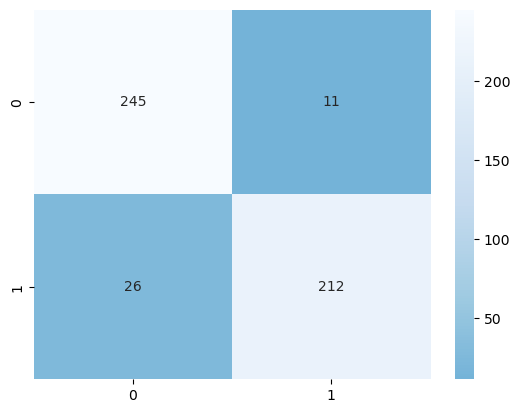

In [16]:
clas.Confusion()

In [17]:
print(clas.classification())

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       256
           1       0.95      0.89      0.92       238

    accuracy                           0.93       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.93      0.92       494



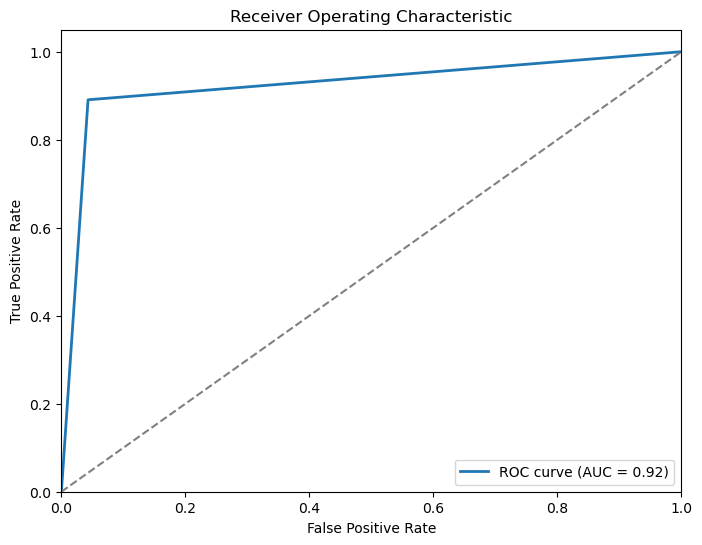

In [18]:
clas.roc_curve()

In [19]:
Reg=Regression()

In [20]:
load=Load_Data()
data=load.data()
data.head()

Pleas Enter Your Path Of Data : train.csv


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
Reg.setup(data=data,target='Item_Outlet_Sales',fold=10,Normlize=True,fix_imbalance=True,feature_selection=True,k=10,outliers_handel=True,dummies=True)

,Description,Value
0,Target,Item_Outlet_Sales
1,Target type,Regression
2,Target mapping,Numerical
3,Original data shape,"(8523, 12)"
4,Transformed data shape,"(8523, 11)"
5,Transformed train set shape,"(6818, 11)"
6,Transformed test set shape,"(1705, 11)"
7,Numeric features,4
8,Categorical features,7
9,Missing Value,True


In [22]:
Reg.compare_models()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.60s/it]


,Models,R2,MAE,MSE,MED
gradient,GradientBoostingRegressor,0.607480,732.833372,1.032358e+06,501.391515
xgb,XGBRegressor,0.557748,774.701184,1.162061e+06,536.701515
random,RandomForestRegressor,0.548600,780.795632,1.187056e+06,531.257466
knn,KNeighborsRegressor,0.539545,787.418703,1.211495e+06,545.536546
lasso,Lasso,0.573190,809.589285,1.122883e+06,624.723661
linear,LinearRegression,0.573153,809.656929,1.122969e+06,623.656403
rid,Ridge,0.573159,809.668260,1.122960e+06,623.843306
sgd,SGDRegressor,0.573166,810.146939,1.122901e+06,625.463947
decision,DecisionTreeRegressor,0.211743,1022.789365,2.070695e+06,688.753455
svr,SVR,0.117367,1137.332841,2.327895e+06,880.166174


In [23]:
Reg.automl()

GradientBoostingRegressor()

In [24]:
Reg.create_model(Reg.automl())
Reg.evaluate_model(cross_validation=True)

10it [00:04,  2.11it/s]


,R2,MAE,MSE,MED
0,0.613130,722.275641,9.778549e+05,510.061105
1,0.608414,713.600917,1.003601e+06,489.301153
2,0.640139,715.453460,1.009638e+06,480.745481
3,0.605210,708.464376,9.600383e+05,466.080054
4,0.617658,713.269444,9.738423e+05,483.909132
5,0.633718,736.860135,1.065890e+06,504.673713
6,0.595335,773.689612,1.102721e+06,560.080353
7,0.570650,773.980578,1.140595e+06,527.308604
8,0.586143,725.819725,9.973259e+05,513.217292
9,0.605274,744.134073,1.089764e+06,478.538261


In [25]:
Reg.Check()

R2 Score is : 0.6351056782050277
Mean Absolute Error Value is :  693.4502595661667
Mean Squared Error Value is :  929100.5865194055
Median Absolute Error Value is :  484.09787789437314
